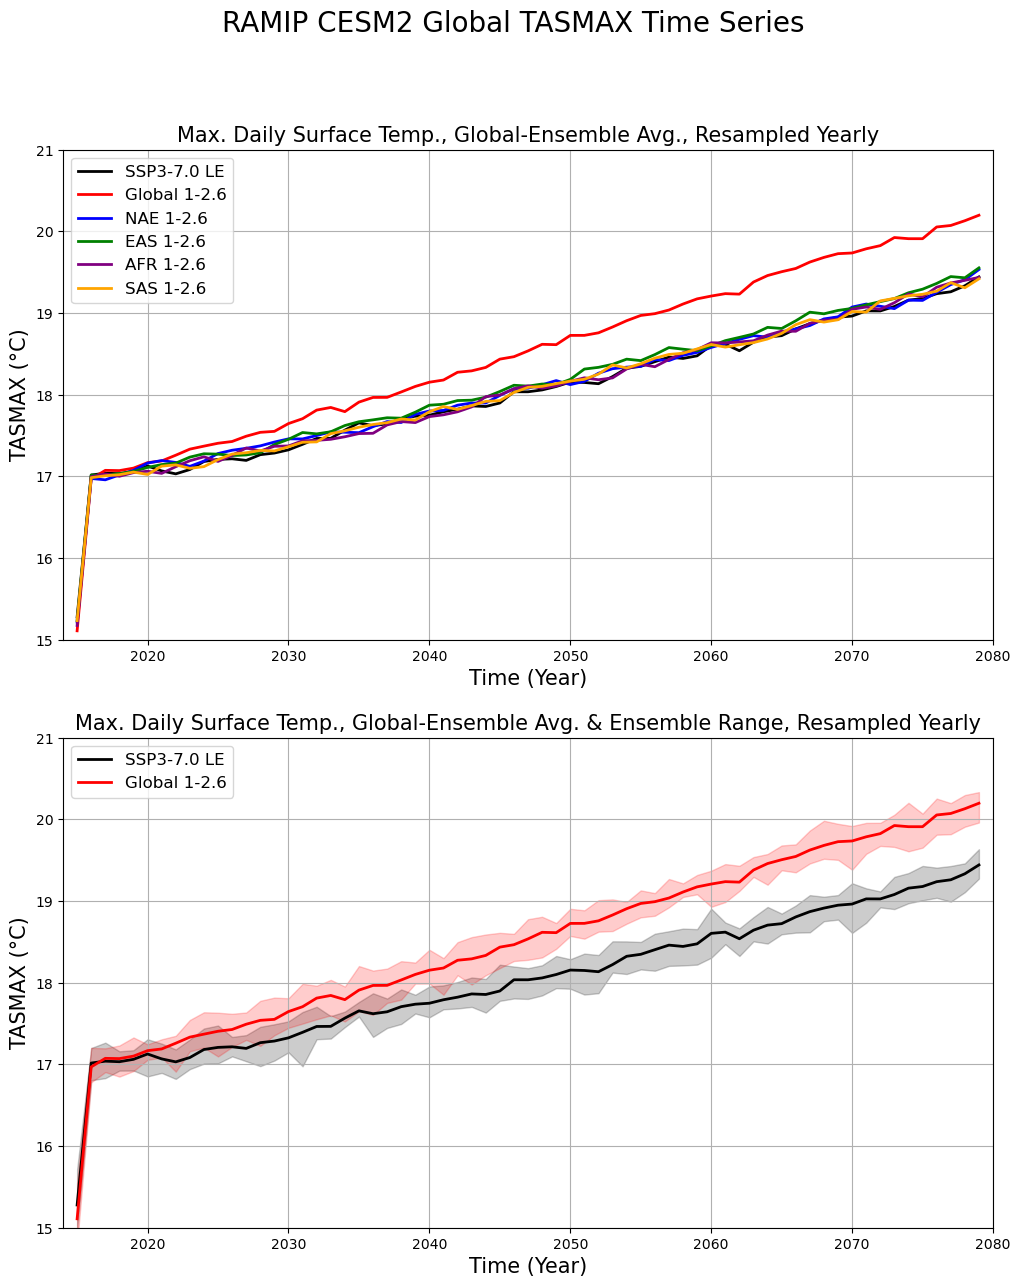

In [65]:
import xarray
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
import dask
import cftime
import cartopy.crs as ccrs


tasmax_datasets = xarray.open_dataset("/projects/dgs/persad_research/cummins_ramip/DATA/ANALYSIS_OUTPUT/post_processing/CESM2_tasmax_resampled_yearly.nc") - 273.15

tasmax_em_avg = tasmax_datasets.weighted(np.cos(np.deg2rad(tasmax_datasets.lat))).mean(dim=["member", "lat", "lon"])
tasmax_em_min = tasmax_datasets.weighted(np.cos(np.deg2rad(tasmax_datasets.lat))).mean(dim=["lat", "lon"]).min(dim="member")
tasmax_em_max = tasmax_datasets.weighted(np.cos(np.deg2rad(tasmax_datasets.lat))).mean(dim=["lat", "lon"]).max(dim="member")

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14), facecolor='w')

lw = 2

tasmax_em_avg["TASMAX_LE"].plot(ax=ax1, label="SSP3-7.0 LE", color="Black", linewidth=lw)
tasmax_em_avg["TASMAX_GLOBAL"].plot(ax=ax1, label="Global 1-2.6", color="Red", linewidth=lw)
tasmax_em_avg["TASMAX_NAE"].plot(ax=ax1, label="NAE 1-2.6", color="Blue", linewidth=lw)
tasmax_em_avg["TASMAX_EAS"].plot(ax=ax1, label="EAS 1-2.6", color="Green", linewidth=lw)
tasmax_em_avg["TASMAX_AFR"].plot(ax=ax1, label="AFR 1-2.6", color="Purple", linewidth=lw)
tasmax_em_avg["TASMAX_SAS"].plot(ax=ax1, label="SAS 1-2.6", color="Orange", linewidth=lw)

tasmax_em_avg["TASMAX_LE"].plot(ax=ax2, label="SSP3-7.0 LE", color="Black", linewidth=lw)
tasmax_em_avg["TASMAX_GLOBAL"].plot(ax=ax2, label="Global 1-2.6", color="Red", linewidth=lw)

ax2.fill_between(tasmax_em_avg.year, tasmax_em_min["TASMAX_LE"], tasmax_em_max["TASMAX_LE"], color="Black", alpha=0.2)
ax2.fill_between(tasmax_em_avg.year, tasmax_em_min["TASMAX_GLOBAL"], tasmax_em_max["TASMAX_GLOBAL"], color="Red", alpha=0.2)

ax1.legend(fontsize=12)
ax1.grid()
ax1.set_xlim(2014, 2080)
ax1.set_ylim(15, 21)
ax1.set_ylabel("TASMAX (°C)", fontsize=15)
ax1.set_xlabel("Time (Year)", fontsize=15)
ax1.set_title("Max. Daily Surface Temp., Global-Ensemble Avg., Resampled Yearly", fontsize=15)

ax2.legend(fontsize=12, loc="upper left")
ax2.grid()
ax2.set_xlim(2014, 2080)
ax2.set_ylim(15, 21)
ax2.set_ylabel("TASMAX (°C)", fontsize=15)
ax2.set_xlabel("Time (Year)", fontsize=15)
ax2.set_title("Max. Daily Surface Temp., Global-Ensemble Avg. & Ensemble Range, Resampled Yearly", fontsize=15)

f.suptitle("RAMIP CESM2 Global TASMAX Time Series", fontsize=20)
f.show()

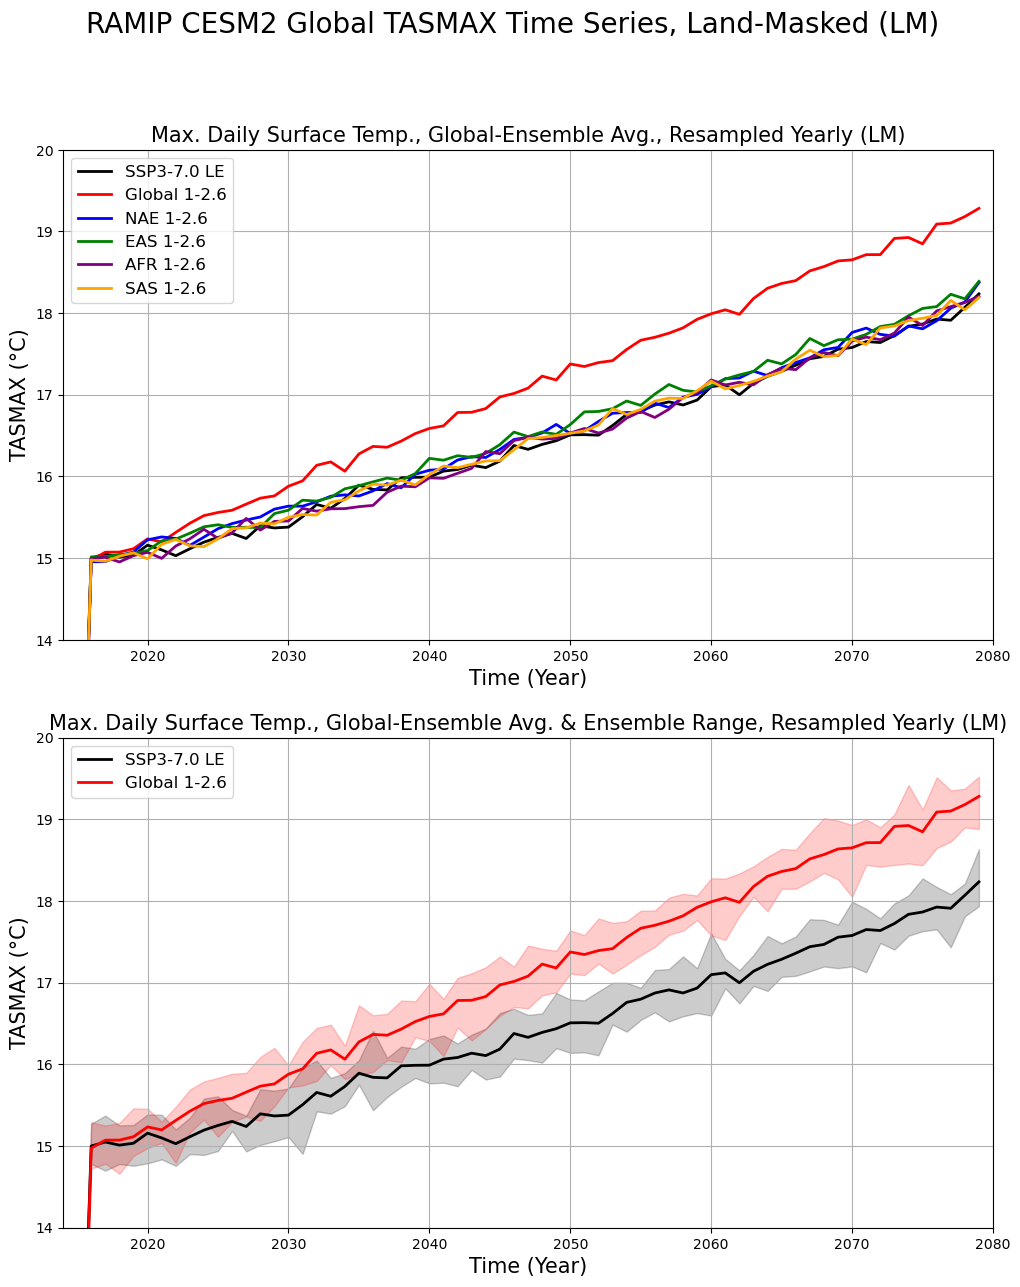

In [44]:
land_mask = xarray.open_dataset("/projects/dgs/persad_research/cummins_ramip/DATA/LENS2_LANDFRAC/b.e21.BSSP370cmip6.f09_g17.LE2-1001.001.cam.h0.LANDFRAC.201501-202412.nc")["LANDFRAC"].mean(dim="time")

tasmax_em_avg_lm = tasmax_datasets.where(land_mask>0).weighted(np.cos(np.deg2rad(tasmax_datasets.lat))).mean(dim=["member", "lat", "lon"]) - 273.15
tasmax_em_min_lm = tasmax_datasets.where(land_mask>0).weighted(np.cos(np.deg2rad(tasmax_datasets.lat))).mean(dim=["lat", "lon"]).min(dim="member") - 273.15
tasmax_em_max_lm = tasmax_datasets.where(land_mask>0).weighted(np.cos(np.deg2rad(tasmax_datasets.lat))).mean(dim=["lat", "lon"]).max(dim="member") - 273.15

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14), facecolor='w')

lw = 2

tasmax_em_avg_lm["TASMAX_LE"].plot(ax=ax1, label="SSP3-7.0 LE", color="Black", linewidth=lw)
tasmax_em_avg_lm["TASMAX_GLOBAL"].plot(ax=ax1, label="Global 1-2.6", color="Red", linewidth=lw)
tasmax_em_avg_lm["TASMAX_NAE"].plot(ax=ax1, label="NAE 1-2.6", color="Blue", linewidth=lw)
tasmax_em_avg_lm["TASMAX_EAS"].plot(ax=ax1, label="EAS 1-2.6", color="Green", linewidth=lw)
tasmax_em_avg_lm["TASMAX_AFR"].plot(ax=ax1, label="AFR 1-2.6", color="Purple", linewidth=lw)
tasmax_em_avg_lm["TASMAX_SAS"].plot(ax=ax1, label="SAS 1-2.6", color="Orange", linewidth=lw)

tasmax_em_avg_lm["TASMAX_LE"].plot(ax=ax2, label="SSP3-7.0 LE", color="Black", linewidth=lw)
tasmax_em_avg_lm["TASMAX_GLOBAL"].plot(ax=ax2, label="Global 1-2.6", color="Red", linewidth=lw)

ax2.fill_between(tasmax_em_avg_lm.year, tasmax_em_min_lm["TASMAX_LE"], tasmax_em_max_lm["TASMAX_LE"], color="Black", alpha=0.2)
ax2.fill_between(tasmax_em_avg_lm.year, tasmax_em_min_lm["TASMAX_GLOBAL"], tasmax_em_max_lm["TASMAX_GLOBAL"], color="Red", alpha=0.2)

ax1.legend(fontsize=12)
ax1.grid()
ax1.set_xlim(2014, 2080)
ax1.set_ylim(14, 20)
ax1.set_ylabel("TASMAX (°C)", fontsize=15)
ax1.set_xlabel("Time (Year)", fontsize=15)
ax1.set_title("Max. Daily Surface Temp., Global-Ensemble Avg., Resampled Yearly (LM)", fontsize=15)

ax2.legend(fontsize=12, loc="upper left")
ax2.grid()
ax2.set_xlim(2014, 2080)
ax2.set_ylim(14, 20)
ax2.set_ylabel("TASMAX (°C)", fontsize=15)
ax2.set_xlabel("Time (Year)", fontsize=15)
ax2.set_title("Max. Daily Surface Temp., Global-Ensemble Avg. & Ensemble Range, Resampled Yearly (LM)", fontsize=15)

f.suptitle("RAMIP CESM2 Global TASMAX Time Series, Land-Masked (LM)", fontsize=20)
f.show()

In [66]:
first_decadal_tasmax = tasmax_datasets.sel(year=slice(2020, 2049)).mean(dim=["year", "member"])
sec_decadal_tasmax = tasmax_datasets.sel(year=slice(2050, 2079)).mean(dim=["year", "member"])

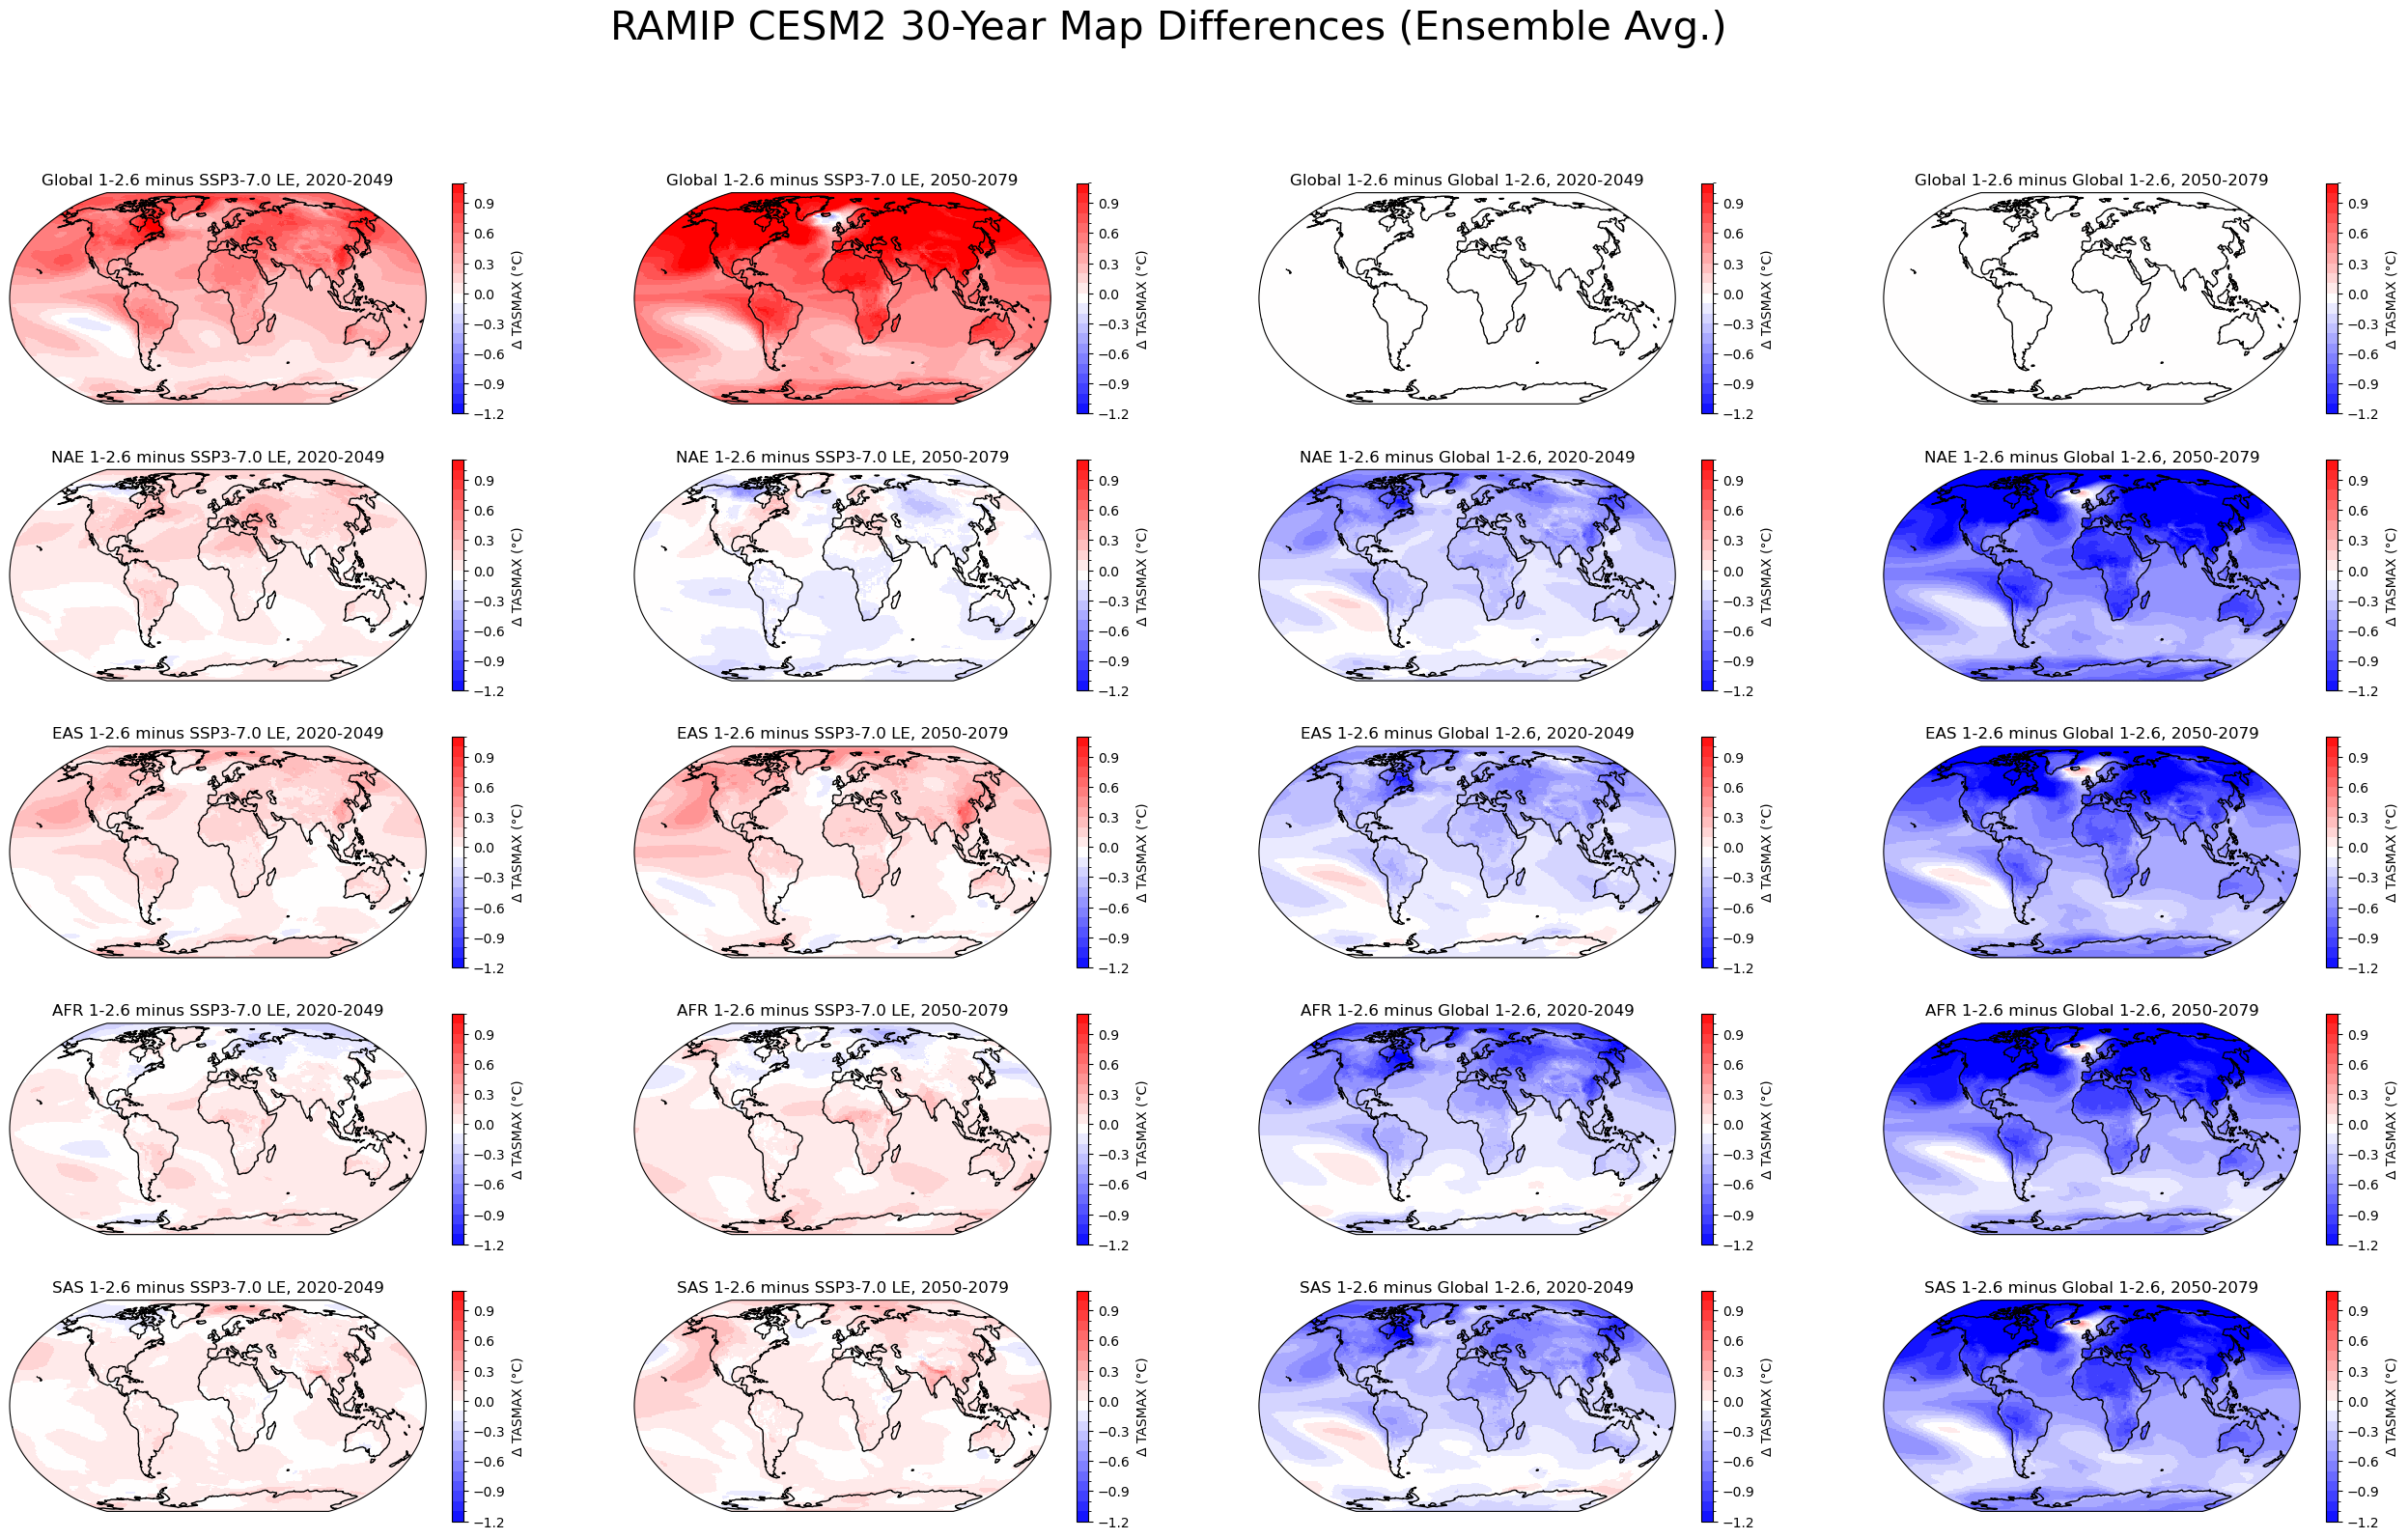

In [101]:
proj = ccrs.Robinson()
f, axes = plt.subplots(5, 4, figsize=(32, 18), facecolor='w', subplot_kw=dict(projection=proj))

variables = [('TASMAX_GLOBAL', "Global 1-2.6"),
             ('TASMAX_NAE', "NAE 1-2.6"),
             ('TASMAX_EAS', "EAS 1-2.6"),
             ('TASMAX_AFR', "AFR 1-2.6"),
             ('TASMAX_SAS', "SAS 1-2.6")]

tfz = 12
cmap = "bwr"
proj = ccrs.PlateCarree()
levels = np.arange(-1.2, 1.2, 0.1)

for index, (variable, label) in enumerate(variables):
    (first_decadal_tasmax[variable] - first_decadal_tasmax["TASMAX_LE"]).rename("Δ TASMAX (°C)").plot(ax=axes[index, 0], cmap=cmap, levels=levels, transform=proj, extend="both", cbar_kwargs={"extendfrac":0})
    (sec_decadal_tasmax[variable] - sec_decadal_tasmax["TASMAX_LE"]).rename("Δ TASMAX (°C)").plot(ax=axes[index, 1], cmap=cmap, levels=levels, transform=proj, extend="both", cbar_kwargs={"extendfrac":0})
    (first_decadal_tasmax[variable] - first_decadal_tasmax["TASMAX_GLOBAL"]).rename("Δ TASMAX (°C)").plot(ax=axes[index, 2], cmap=cmap, levels=levels, transform=proj, extend="both", cbar_kwargs={"extendfrac":0})
    (sec_decadal_tasmax[variable] - sec_decadal_tasmax["TASMAX_GLOBAL"]).rename("Δ TASMAX (°C)").plot(ax=axes[index, 3], cmap=cmap, levels=levels, transform=proj, extend="both", cbar_kwargs={"extendfrac":0})
    
    axes[index, 0].set_title(f"{label} minus SSP3-7.0 LE, 2020-2049", fontsize=tfz)
    axes[index, 1].set_title(f"{label} minus SSP3-7.0 LE, 2050-2079", fontsize=tfz)
    axes[index, 2].set_title(f"{label} minus Global 1-2.6, 2020-2049", fontsize=tfz)
    axes[index, 3].set_title(f"{label} minus Global 1-2.6, 2050-2079", fontsize=tfz)
    
for row in axes:
    for ax in row:
        ax.coastlines()

f.suptitle("RAMIP CESM2 30-Year Map Differences (Ensemble Avg.)", fontsize=30)
f.show()